In [3]:
# normalize data
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [4]:
X_train_data = np.load('X_train_data.npy')

In [5]:
X_test_data = np.load('X_test_data.npy')

In [6]:
Y_train_data = np.load('Y_train_data.npy')

In [7]:
Y_test_data = np.load('Y_test_data.npy')

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
import xgboost as xgb
import catboost as cat
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report,ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# LOGİSTİC REGRİSSİON

In [9]:
random_grid_lr = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500,5000]
}
]

In [10]:
from sklearn.model_selection import RandomizedSearchCV
logistic_model = LogisticRegression()
lr_random = RandomizedSearchCV(estimator = logistic_model, param_distributions = random_grid_lr, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
lr_random.fit(X_train_data,Y_train_data)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\Furka\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
c:\Users\Furka\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.56810867        nan 0.43539122 0.82447257        nan 0.65660375
        nan        nan 0.68610852        nan        nan        nan
 0.6334118  0.66292842 0.61445703 0.38483233        nan 0.65660227
 0.52105411        nan 0.6790969  0.56810867 0.65941372        nan
 0.3841291  0.68049004 0.68610852 0.73177289        nan        nan
        nan 0.48314161 0.64115182 0.74722037 0.91714117 0.64607299
 0.3841291         nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.5948005  0.62077726
 0.65941372 0.64888445        nan 0.82447257 0.63553335        nan
 0.7738974     

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                         'max_iter': [100, 1000, 2500, 5000],
                                         'penalty': ['l1', 'l2', 'elasticnet',
                                                     'none'],
                                         'solver': ['lbfgs', 'newton-cg',
                                                    'liblinear', 'sag',
                                                    'saga']}],
                   random_state=42, verbose=2)

In [11]:
lr_random.best_params_

{'solver': 'newton-cg',
 'penalty': 'none',
 'max_iter': 5000,
 'C': 11.288378916846883}

In [12]:
logistic_model = LogisticRegression(solver="newton-cg",penalty="none",max_iter=5000,C=11.288378916846883)
lr_fitting = logistic_model.fit(X_train_data,Y_train_data)
lr_fitting.score(X_test_data,Y_test_data)

c:\Users\Furka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


0.9578651685393258

In [14]:
logistic_model_predict = lr_fitting.predict(X_test_data)
print(classification_report(Y_test_data,logistic_model_predict))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95        95
           1       0.95      0.99      0.97        70
           2       0.94      0.97      0.96       135
           3       0.96      1.00      0.98        55
           4       0.00      0.00      0.00         1

    accuracy                           0.96       356
   macro avg       0.77      0.77      0.77       356
weighted avg       0.96      0.96      0.96       356



c:\Users\Furka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Furka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Furka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
np.sqrt(mean_squared_error(Y_test_data,logistic_model_predict))

0.3633489671240478

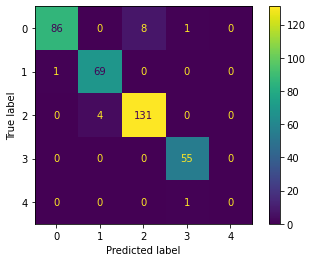

In [16]:
cm = confusion_matrix(Y_test_data, logistic_model_predict)
cm_display = ConfusionMatrixDisplay(cm).plot()

# SVC

In [17]:
params =[{'C': [0.1,1, 10, 100], 
         'kernel': ['poly','sigmoid','linear','rbf'],
         'gamma': [1,0.1,0.01,0.001]}
]

In [18]:
sv = SVC()

clf = RandomizedSearchCV(estimator=sv,
                   cv = 3, 
                   param_distributions=params,
                   scoring='accuracy', 
                   n_jobs = -1,
                   verbose=1)
clf.fit(X_train_data, Y_train_data)
print("Best parameters:", clf.best_params_)
print("better accuracy: ", (clf.best_score_)**(1/2.0))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\Furka\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Best parameters: {'kernel': 'linear', 'gamma': 1, 'C': 10}
better accuracy:  0.8446905407926866


In [19]:
svm_model = svm.SVC(C=10,kernel="linear",gamma=1)
svm_fitting = svm_model.fit(X_train_data,Y_train_data)
svm_model_predict = svm_model.predict(X_test_data)
svm_fitting.score(X_test_data,Y_test_data)

0.7612359550561798

In [20]:
print(classification_report(Y_test_data,svm_model_predict))

              precision    recall  f1-score   support

           0       0.94      0.61      0.74        95
           1       0.71      0.71      0.71        70
           2       0.72      0.89      0.79       135
           3       0.75      0.78      0.77        55
           4       0.00      0.00      0.00         1

    accuracy                           0.76       356
   macro avg       0.62      0.60      0.60       356
weighted avg       0.78      0.76      0.76       356



c:\Users\Furka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Furka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Furka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
np.sqrt(mean_squared_error(Y_test_data,svm_model_predict))

0.6910340728847171

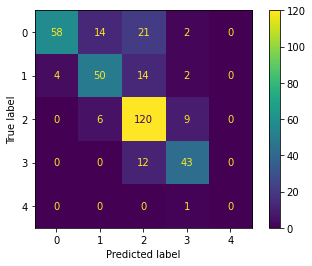

In [22]:
cm = confusion_matrix(Y_test_data, svm_model_predict)
cm_display = ConfusionMatrixDisplay(cm).plot()

# DECISION TREE

In [23]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [24]:
decision_tree_model = DecisionTreeClassifier()
randomized_search_dt = RandomizedSearchCV(estimator=decision_tree_model, 
                           param_distributions=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
randomized_search_dt.fit(X_train_data,Y_train_data)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


c:\Users\Furka\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10, 20],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100]},
                   scoring='accuracy', verbose=1)

In [25]:
print(randomized_search_dt.best_params_)

{'min_samples_leaf': 10, 'max_depth': 10, 'criterion': 'entropy'}


In [26]:
decision_tree_model = DecisionTreeClassifier(min_samples_leaf=5,max_depth=10,criterion="entropy")
dt_fitting = decision_tree_model.fit(X_train_data,Y_train_data)
decision_tree_model_predict = decision_tree_model.predict(X_test_data)
dt_fitting.score(X_test_data,Y_test_data)

0.8539325842696629

In [27]:
print(classification_report(Y_test_data,decision_tree_model_predict))

              precision    recall  f1-score   support

           0       0.95      0.86      0.91        95
           1       0.78      0.83      0.81        70
           2       0.84      0.87      0.85       135
           3       0.82      0.85      0.84        55
           4       0.00      0.00      0.00         1

    accuracy                           0.85       356
   macro avg       0.68      0.68      0.68       356
weighted avg       0.86      0.85      0.85       356



c:\Users\Furka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Furka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Furka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
np.sqrt(mean_squared_error(Y_test_data,decision_tree_model_predict))

0.5138530371810842

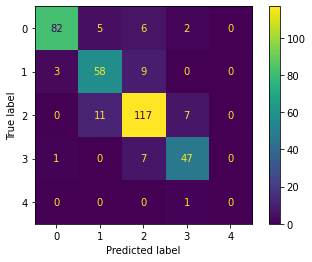

In [29]:
cm = confusion_matrix(Y_test_data, decision_tree_model_predict)
cm_display = ConfusionMatrixDisplay(cm).plot()

# XGB

In [30]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
}
clf = RandomizedSearchCV(clf_xgb, param_distributions = parameters, n_iter = 25, scoring = 'roc_auc', error_score = 0, verbose =3,n_jobs=-1)

In [31]:
clf = clf.fit(X_train_data,Y_train_data)
clf

Fitting 5 folds for each of 25 candidates, totalling 125 fits


c:\Users\Furka\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[15:05:28] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "criterion", "loss", "max_features", "min_samples_leaf", "min_samples_split" } are not used.



RandomizedSearchCV(error_score=0,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           lear...
                                        'min_samples_leaf': array([0.1       , 0.13636364, 0.17

In [32]:
clf.best_params_

{'subsample': 0.618,
 'n_estimators': 10,
 'min_samples_split': 0.24545454545454548,
 'min_samples_leaf': 0.31818181818181823,
 'max_features': 'sqrt',
 'max_depth': 3,
 'loss': 'deviance',
 'learning_rate': 0.01,
 'criterion': 'mae'}

In [35]:
xgboost_model = GradientBoostingClassifier(subsample= 0.618,n_estimators=10,min_samples_split=0.24545454545454548,min_samples_leaf=0.31818181818181823,max_features="sqrt",max_depth=3,loss="deviance",learning_rate=0.01,criterion="mae")
xgb_fitting = xgboost_model.fit(X_train_data,Y_train_data)
xgboost_model_predict = xgboost_model.predict(X_test_data)

c:\Users\Furka\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "


In [36]:
print(classification_report(Y_test_data,xgboost_model_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        95
           1       0.00      0.00      0.00        70
           2       0.38      1.00      0.55       135
           3       0.00      0.00      0.00        55
           4       0.00      0.00      0.00         1

    accuracy                           0.38       356
   macro avg       0.08      0.20      0.11       356
weighted avg       0.14      0.38      0.21       356



c:\Users\Furka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Furka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Furka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
np.sqrt(mean_squared_error(Y_test_data,xgboost_model_predict))

1.1957321108420884

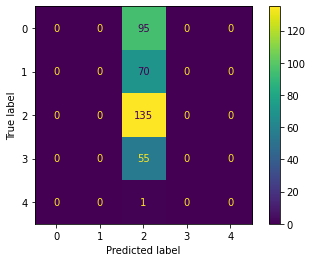

In [38]:
cm = confusion_matrix(Y_test_data, xgboost_model_predict)
cm_display = ConfusionMatrixDisplay(cm).plot()

# MLP

In [39]:
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [40]:
mlp = MLPClassifier(max_iter=100)
random_mlp = RandomizedSearchCV(estimator=mlp,param_distributions=parameter_space,n_iter=100,cv=3,verbose=2,random_state=41,n_jobs=-1)

In [41]:
random_mlp.fit(X_train_data,Y_train_data)
random_mlp.best_params_

c:\Users\Furka\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Furka\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Fitting 3 folds for each of 32 candidates, totalling 96 fits


c:\Users\Furka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


{'solver': 'adam',
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (10, 30, 10),
 'alpha': 0.05,
 'activation': 'tanh'}

In [42]:
MLP_model = MLPClassifier(solver="adam",learning_rate="adaptive",hidden_layer_sizes=(10,30,10),alpha=0.005,activation="tanh")
mlp_fitting = MLP_model.fit(X_train_data,Y_train_data)
MLP_model_predict = MLP_model.predict(X_test_data)

c:\Users\Furka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [43]:
print(classification_report(Y_test_data,MLP_model_predict))

              precision    recall  f1-score   support

           0       0.86      0.65      0.74        95
           1       0.64      0.61      0.63        70
           2       0.71      0.85      0.77       135
           3       0.76      0.76      0.76        55
           4       0.00      0.00      0.00         1

    accuracy                           0.74       356
   macro avg       0.60      0.58      0.58       356
weighted avg       0.74      0.74      0.73       356



c:\Users\Furka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Furka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Furka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
np.sqrt(mean_squared_error(Y_test_data,MLP_model_predict))

0.7090902543146711

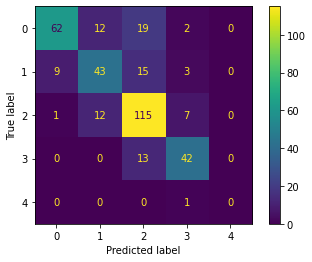

In [45]:
cm = confusion_matrix(Y_test_data, MLP_model_predict)
cm_display = ConfusionMatrixDisplay(cm).plot()

# RANDOM FOREST

In [46]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130,180,230]}

In [47]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_data,Y_train_data)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\Furka\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 180, 230]},
                   random_state=42, verbose=2)

In [48]:
rf_random.best_params_

{'n_estimators': 230,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [49]:
Random_Forest_model = RandomForestClassifier(n_estimators=230,min_samples_split=2,min_samples_leaf=1,max_features="sqrt",max_depth=100,bootstrap="False")
rf_fitting = Random_Forest_model.fit(X_train_data,Y_train_data)
Random_Forest_model_predict = Random_Forest_model.predict(X_test_data)

In [50]:
print(classification_report(Y_test_data,Random_Forest_model_predict))

              precision    recall  f1-score   support

           0       0.95      0.86      0.91        95
           1       0.85      0.81      0.83        70
           2       0.86      0.94      0.90       135
           3       0.88      0.89      0.88        55
           4       0.00      0.00      0.00         1

    accuracy                           0.88       356
   macro avg       0.71      0.70      0.70       356
weighted avg       0.88      0.88      0.88       356



c:\Users\Furka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Furka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Furka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
np.sqrt(mean_squared_error(Y_test_data,Random_Forest_model_predict))

0.44971901339751685

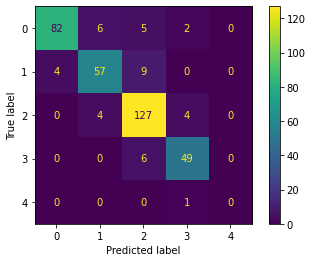

In [52]:
cm = confusion_matrix(Y_test_data, Random_Forest_model_predict)
cm_display = ConfusionMatrixDisplay(cm).plot()

# CATBOOST

In [53]:
grid = {
    'learning_rate': [0.05, 0.07, 0.09, 0.3],
    'depth': [5, 6, 7],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide']
}

In [54]:
catboost = cat.CatBoostClassifier()
random_cat = RandomizedSearchCV(catboost,grid, cv=5, n_jobs=-1,n_iter=100)
random_cat.fit(X_train_data, Y_train_data)

c:\Users\Furka\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0:	learn: 1.5006803	total: 146ms	remaining: 2m 26s
1:	learn: 1.4027516	total: 149ms	remaining: 1m 14s
2:	learn: 1.3235333	total: 152ms	remaining: 50.5s
3:	learn: 1.2699756	total: 155ms	remaining: 38.5s
4:	learn: 1.2201551	total: 157ms	remaining: 31.3s
5:	learn: 1.1603792	total: 160ms	remaining: 26.5s
6:	learn: 1.1145984	total: 163ms	remaining: 23.1s
7:	learn: 1.0719771	total: 165ms	remaining: 20.5s
8:	learn: 1.0292596	total: 168ms	remaining: 18.5s
9:	learn: 0.9917183	total: 171ms	remaining: 16.9s
10:	learn: 0.9569991	total: 173ms	remaining: 15.6s
11:	learn: 0.9284466	total: 176ms	remaining: 14.5s
12:	learn: 0.8992337	total: 178ms	remaining: 13.5s
13:	learn: 0.8721328	total: 181ms	remaining: 12.7s
14:	learn: 0.8488841	total: 183ms	remaining: 12s
15:	learn: 0.8316483	total: 186ms	remaining: 11.4s
16:	learn: 0.8086583	total: 189ms	remaining: 10.9s
17:	learn: 0.7907969	total: 191ms	remaining: 10.4s
18:	learn: 0.7739328	total: 194ms	remaining: 10s
19:	learn: 0.7560447	total: 196ms	remaining

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000001BB4DFFCB80>,
                   n_iter=100, n_jobs=-1,
                   param_distributions={'depth': [5, 6, 7],
                                        'grow_policy': ['SymmetricTree',
                                                        'Depthwise',
                                                        'Lossguide'],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.05, 0.07, 0.09,
                                                          0.3]})

In [55]:
random_cat.best_params_

{'learning_rate': 0.07,
 'l2_leaf_reg': 3,
 'grow_policy': 'SymmetricTree',
 'depth': 5}

In [56]:
CatBoost_model = cat.CatBoostClassifier(learning_rate=0.07,l2_leaf_reg=3,grow_policy="SymmetricTree",depth=5)
catb_fitting = CatBoost_model.fit(X_train_data,Y_train_data)
CatBoost_model_predict = CatBoost_model.predict(X_test_data)

0:	learn: 1.5006803	total: 3.21ms	remaining: 3.21s
1:	learn: 1.4027516	total: 6.28ms	remaining: 3.13s
2:	learn: 1.3235333	total: 9.1ms	remaining: 3.02s
3:	learn: 1.2699756	total: 12.1ms	remaining: 3.01s
4:	learn: 1.2201551	total: 15.8ms	remaining: 3.15s
5:	learn: 1.1603792	total: 18.5ms	remaining: 3.07s
6:	learn: 1.1145984	total: 21.2ms	remaining: 3s
7:	learn: 1.0719771	total: 23.6ms	remaining: 2.93s
8:	learn: 1.0292596	total: 26ms	remaining: 2.86s
9:	learn: 0.9917183	total: 28.7ms	remaining: 2.84s
10:	learn: 0.9569991	total: 31.2ms	remaining: 2.81s
11:	learn: 0.9284466	total: 33.7ms	remaining: 2.77s
12:	learn: 0.8992337	total: 36ms	remaining: 2.73s
13:	learn: 0.8721328	total: 39.2ms	remaining: 2.76s
14:	learn: 0.8488841	total: 41.7ms	remaining: 2.74s
15:	learn: 0.8316483	total: 44.7ms	remaining: 2.75s
16:	learn: 0.8086583	total: 47.9ms	remaining: 2.77s
17:	learn: 0.7907969	total: 50.8ms	remaining: 2.77s
18:	learn: 0.7739328	total: 53.4ms	remaining: 2.76s
19:	learn: 0.7560447	total: 55

In [57]:
print(classification_report(Y_test_data,CatBoost_model_predict))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        95
           1       0.88      0.93      0.90        70
           2       0.96      0.96      0.96       135
           3       0.90      0.98      0.94        55
           4       0.00      0.00      0.00         1

    accuracy                           0.93       356
   macro avg       0.74      0.75      0.74       356
weighted avg       0.93      0.93      0.93       356



c:\Users\Furka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Furka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Furka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
np.sqrt(mean_squared_error(Y_test_data,CatBoost_model_predict))

0.40014042478930045

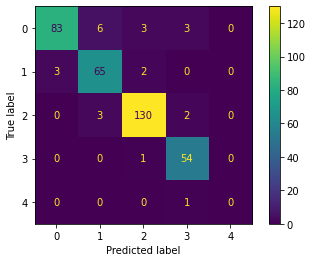

In [59]:
cm = confusion_matrix(Y_test_data, CatBoost_model_predict)
cm_display = ConfusionMatrixDisplay(cm).plot()